In [ ]:
import pandas as pd 
data=pd.read_csv("titanic-passengers.csv",sep=";")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# Data Preprocessing 

In [ ]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [ ]:
data.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data["Age"].fillna(data["Age"].mean(),inplace=True)
data.drop(["Cabin","PassengerId","Ticket"],axis=1,inplace=True)
data.dropna(axis=0,how="any",inplace=True)


In [ ]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data["Embarked"].fillna("S",inplace=True)

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
data["Survived"].value_counts()

No     549
Yes    340
Name: Survived, dtype: int64

In [ ]:
data["FamilySize"]=data["SibSp"]+data["Parch"]
data=data.drop(["SibSp","Parch"],axis=1)
data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,13.0000,S,0
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,7.6500,S,0
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,7.8542,S,0
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,21.0750,S,4
4,No,1,"Davidson, Mr. Thornton",male,31.0,52.0000,S,1


In [ ]:
import numpy as np 
tab=data["Name"]
tabb=np.array([])
 
for x in tab :
    x=x.split(", ")
    x=x[1]
    x=x.split(".")
    tabb=np.append(tabb, x[0])

data=data.drop('Name',axis=1)
data["Title"]=tabb


Title_Dictionary = {"Title":{"Capt":"Officer", "Col":"Officer","Major":"Officer","Dr":"Officer", "Rev":"Officer" ,
"Jonkheer": "Royalty", "Don":"Royalty", "Sir" :"Royalty","Lady" :"Royalty","the Countess": "Royalty", "Dona":"Royalty"
,
 "Mme":"Miss","Mlle": "Miss","Miss" :"Miss","Ms": "Mrs", "Mr" :"Mrs","Mrs" :"Mrs"
 ,
  "Master":"Master"

                    }}
data.replace(Title_Dictionary,inplace=True)
data 


,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,No,2,male,28.000000,13.0000,S,0,Mrs
1,No,3,male,25.000000,7.6500,S,0,Mrs
2,No,3,male,20.000000,7.8542,S,0,Mrs
3,No,3,female,29.000000,21.0750,S,4,Mrs
4,No,1,male,31.000000,52.0000,S,1,Mrs
...,...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,30.0708,C,1,Mrs
887,No,3,male,22.000000,7.2292,C,0,Mrs
888,No,3,female,30.000000,8.6625,S,0,Miss
889,No,3,male,29.699118,7.8958,S,0,Mrs


# Feature Selection / logistic Regression / confusion matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder 
encoder=LabelEncoder() 

data["Survived"]=encoder.fit_transform(data["Survived"])
data["Embarked"]=encoder.fit_transform(data["Embarked"])
data["Title"]=encoder.fit_transform(data["Title"])
data["Sex"]=encoder.fit_transform(data["Sex"])

data.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
886,1,2,0,14.000000,30.0708,0,1,2
887,0,3,1,22.000000,7.2292,0,0,2
888,0,3,0,30.000000,8.6625,2,0,1
889,0,3,1,29.699118,7.8958,2,0,2
890,1,2,0,19.000000,26.0000,2,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
target = data['Survived']
X = data.drop('Survived', axis=1)


rfc =LogisticRegression()
rfecv = RFECV(estimator=rfc, scoring="accuracy")
rfecv.fit(X, target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RFECV(cv=None,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

**RFE**

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))


Optimal number of features: 6


In [ ]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[3]


fare isn't an important feature in logistic regression 



**Outliers**


In [ ]:
from scipy import stats 
import numpy as np 
data=data.drop(["Fare"],axis=1)

z=np.abs(stats.zscore(data))
print(z)
print(np.where(z>3))
data=data[(z<3).all(axis=1)]
data


[[0.78696114 0.37350129 0.73534203 ... 0.58683958 0.5618044  0.44292254]
 [0.78696114 0.82520863 0.73534203 ... 0.58683958 0.5618044  0.44292254]
 [0.78696114 0.82520863 0.73534203 ... 0.58683958 0.5618044  0.44292254]
 ...
 [0.78696114 0.82520863 1.35991138 ... 0.58683958 0.5618044  1.22554413]
 [0.78696114 0.82520863 0.73534203 ... 0.58683958 0.5618044  0.44292254]
 [1.27071078 0.37350129 1.35991138 ... 0.58683958 0.5618044  1.22554413]]
(array([ 35,  43,  57, 108, 152, 165, 197, 203, 234, 247, 254, 267, 333,
       340, 381, 397, 435, 466, 489, 506, 508, 515, 519, 534, 536, 547,
       586, 657, 670, 687, 702, 753, 767, 805, 828, 850, 872]), array([6, 5, 3, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5,
       6, 3, 5, 5, 3, 6, 5, 3, 3, 6, 5, 5, 5, 3, 5]))


,Survived,Pclass,Sex,Age,Embarked,FamilySize,Title
0,0,2,1,28.000000,2,0,2
1,0,3,1,25.000000,2,0,2
2,0,3,1,20.000000,2,0,2
3,0,3,0,29.000000,2,4,2
4,0,1,1,31.000000,2,1,2
...,...,...,...,...,...,...,...
886,1,2,0,14.000000,0,1,2
887,0,3,1,22.000000,0,0,2
888,0,3,0,30.000000,2,0,1
889,0,3,1,29.699118,2,0,2


**Logistic Regression /confusion matrix**

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x=data.drop(["Survived"],axis=1)
y=data["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)
model=LogisticRegression() 
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("Accuracy={:.2f}".format(model.score(x_test,y_test)))
confusion_matrix=pd.crosstab(y_test,predicted,rownames=["Actuel"],colnames=["Predicted"])
print(confusion_matrix)
print(classification_report(y_test,predicted))

Accuracy=0.84
Predicted   0   1
Actuel           
0          94  14
1          14  49
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       108
           1       0.78      0.78      0.78        63

    accuracy                           0.84       171
   macro avg       0.82      0.82      0.82       171
weighted avg       0.84      0.84      0.84       171




*  ACCURACY = 0.85 (the correct predictions made of all predictions 17/20) 
*  Recall(out of all the survivors how many did we get correct 9/12 ) 
*  Precison (out of the survivors how many did we actually get right)


*  recall(0)=1  evrey non survivor was well classified 
*   Élément de liste



*   the classifier is confused when it comes to predict survivors

*   the classifierpredictes well the non survivors 






# ROC/AUC

[texte du lien](https://www.youtube.com/watch?v=4jRBRDbJemM)


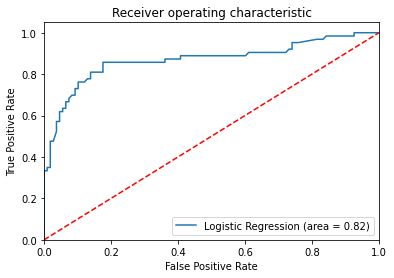

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()